# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [5]:
import numpy as np

data_train = np.loadtxt('D:\Вадим\Работы из настоящего\ЛР-2 task/train.txt', delimiter=',')
data_test = np.loadtxt('D:\Вадим\Работы из настоящего\ЛР-2 task/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [6]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:, 0]
y_test = data_test[:, 1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_with_ones = np.concatenate((np.ones((X_train.shape[0], 1)), X_train.reshape(-1, 1)), axis=1)
b, k = np.linalg.inv(X_train_with_ones.T @ X_train_with_ones) @ X_train_with_ones.T @ y_train
print(f"y = {k:.4f}x + {b:.4f}")

y = 2.2791x + 4.4332


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

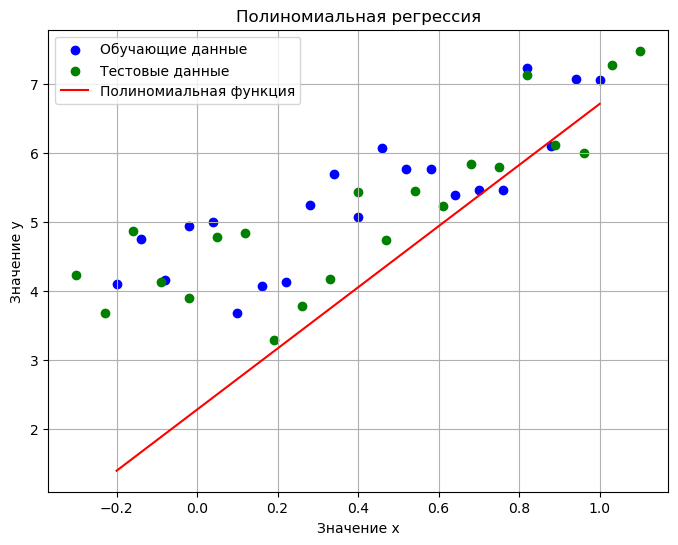

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Обучающие данные', color='blue')  
plt.scatter(X_test, y_test, label='Тестовые данные', color='green')  
x_plot = np.linspace(X_train.min(), X_train.max(), 100)
y_plot = np.polyval([b, k], x_plot)
plt.plot(x_plot, y_plot, color='red', label='Полиномиальная функция')   
plt.xlabel('Значение x') 
plt.ylabel('Значение y')   
plt.title('Полиномиальная регрессия')  
plt.legend() 
plt.grid(True)  
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
degree = 2
X_poly = np.power.outer(X_train, np.arange(degree + 1))
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
print(f"Многочлен: y = {polynomial_str}")

Многочлен: y = 4.4725x^0 + 1.1578x^1 + 1.4016x^2


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

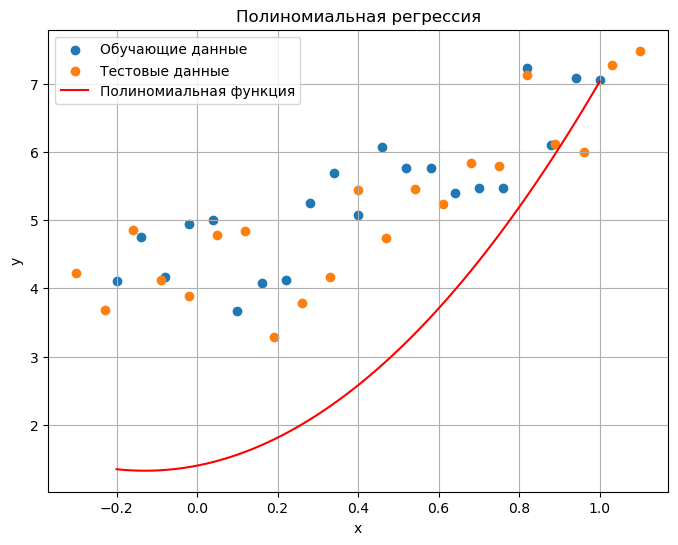

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Обучающие данные')
plt.scatter(X_test, y_test, label='Тестовые данные')
x_plot = np.linspace(X_train.min(), X_train.max(), 100)
y_plot = np.polyval(coefficients, x_plot)
plt.plot(x_plot, y_plot, color='red', label='Полиномиальная функция')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [12]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for degree in range(1, 11):
    X_poly = np.power.outer(X_train, np.arange(degree + 1))
    coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
    polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
    print(f"k = {degree}: y = {polynomial_str}")

k = 1: y = 4.4332x^0 + 2.2791x^1
k = 2: y = 4.4725x^0 + 1.1578x^1 + 1.4016x^2
k = 3: y = 4.4607x^0 + 1.0650x^1 + 1.8598x^2 + -0.3818x^3
k = 4: y = 4.3412x^0 + 1.1718x^1 + 6.7941x^2 + -13.0513x^3 + 7.9185x^4
k = 5: y = 4.4313x^0 + -0.1306x^1 + 3.2747x^2 + 21.3748x^3 + -51.1315x^4 + 29.5250x^5
k = 6: y = 4.3838x^0 + -4.5972x^1 + 16.0029x^2 + 121.2571x^3 + -481.5101x^4 + 581.4533x^5 + -229.9701x^6
k = 7: y = 4.4445x^0 + -4.0089x^1 + 7.2155x^2 + 119.3508x^3 + -314.2312x^4 + 122.8782x^5 + 238.6994x^6 + -167.3820x^7
k = 8: y = 4.6638x^0 + -5.1828x^1 + -26.6956x^2 + 268.8604x^3 + 109.8957x^4 + -3132.8565x^5 + 6760.6286x^6 + -5701.7103x^7 + 1729.4776x^8
k = 9: y = 4.6459x^0 + -4.5527x^1 + -24.2627x^2 + 219.0420x^3 + 176.2454x^4 + -2441.9629x^5 + 3913.2690x^6 + -1216.4496x^7 + -1522.0973x^8 + 903.2152x^9
k = 10: y = 4.6692x^0 + -2.1596x^1 + -36.1758x^2 + 44.9356x^3 + 1201.9524x^4 + -1660.8229x^5 + -12969.9347x^6 + 46686.6491x^7 + -63620.9919x^8 + 40177.5261x^9 + -9818.5768x^10


**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
for degree in range(1, 11):
    X_poly = np.power.outer(X_train, np.arange(degree + 1))
    coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
    polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
    mse_train = np.mean((np.polyval(coefficients, X_train) - y_train)**2)
    mse_test = np.mean((np.polyval(coefficients, X_test) - y_test)**2)
    print(f"k = {degree}:")
    print(f"  MSE (обучение): {mse_train:.4f}")
    print(f"  MSE (тест): {mse_test:.4f}")

k = 1:
  MSE (обучение): 2.5798
  MSE (тест): 2.3859
k = 2:
  MSE (обучение): 5.9239
  MSE (тест): 4.5470
k = 3:
  MSE (обучение): 15.9303
  MSE (тест): 13.7256
k = 4:
  MSE (обучение): 7.8934
  MSE (тест): 11.7999
k = 5:
  MSE (обучение): 272.8581
  MSE (тест): 362.7898
k = 6:
  MSE (обучение): 25470.1262
  MSE (тест): 35595.2164
k = 7:
  MSE (обучение): 12650.0807
  MSE (тест): 14289.8173
k = 8:
  MSE (обучение): 1499473.5075
  MSE (тест): 2402262.7450
k = 9:
  MSE (обучение): 321252.8026
  MSE (тест): 365963.5728
k = 10:
  MSE (обучение): 55724166.9547
  MSE (тест): 101688204.0043


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Многочлен степени 1: y = 4.4332x^0 + 2.2791x^1
Многочлен степени 2: y = 4.4725x^0 + 1.1578x^1 + 1.4016x^2
Многочлен степени 3: y = 4.4607x^0 + 1.0650x^1 + 1.8598x^2 + -0.3818x^3
Многочлен степени 4: y = 4.3412x^0 + 1.1718x^1 + 6.7941x^2 + -13.0513x^3 + 7.9185x^4
Многочлен степени 5: y = 4.4313x^0 + -0.1306x^1 + 3.2747x^2 + 21.3748x^3 + -51.1315x^4 + 29.5250x^5


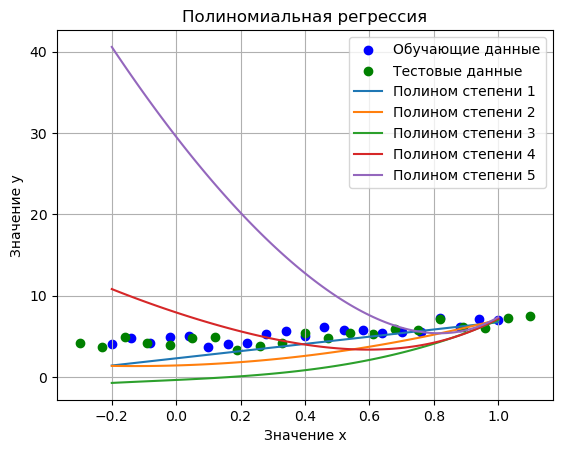

Многочлен степени 6: y = 4.3838x^0 + -4.5972x^1 + 16.0029x^2 + 121.2571x^3 + -481.5101x^4 + 581.4533x^5 + -229.9701x^6


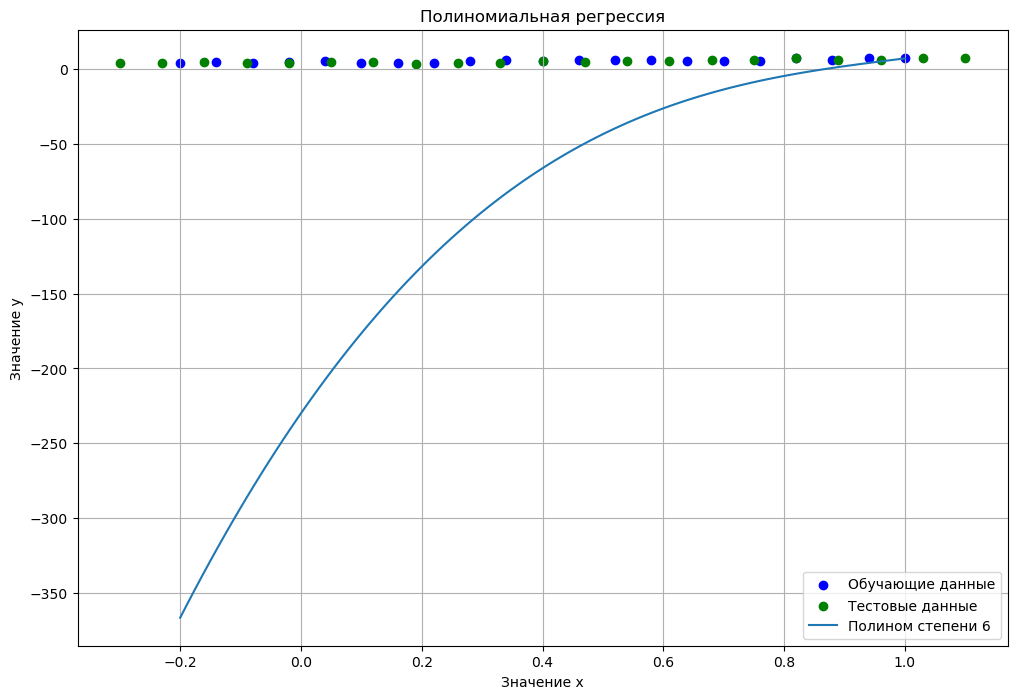

In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟplt.figure(figsize=(12, 8))  
#при k = 1, 2, 3, 4, 5:
plt.scatter(X_train, y_train, label='Обучающие данные', color='blue')
plt.scatter(X_test, y_test, label='Тестовые данные', color='green')
x_plot = np.linspace(X_train.min(), X_train.max(), 100)
for degree in range(1, 6):
    X_poly = np.power.outer(X_train, np.arange(degree + 1))
    coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
    polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
    print(f"Многочлен степени {degree}: y = {polynomial_str}")
    y_plot = np.polyval(coefficients, x_plot)
    plt.plot(x_plot, y_plot, label=f'Полином степени {degree}')

plt.xlabel('Значение x')
plt.ylabel('Значение y')
plt.title('Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()

#при k = 6
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, label='Обучающие данные', color='blue')
plt.scatter(X_test, y_test, label='Тестовые данные', color='green')
x_plot = np.linspace(X_train.min(), X_train.max(), 100)
X_poly = np.power.outer(X_train, np.arange(7))
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
print(f"Многочлен степени {6}: y = {polynomial_str}")
y_plot = np.polyval(coefficients, x_plot)
plt.plot(x_plot, y_plot, label=f'Полином степени {6}')

plt.xlabel('Значение x')
plt.ylabel('Значение y')
plt.title('Полиномиальная регрессия')
plt.legend()
plt.grid(True)
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
При росте степени многочлена ошибка увеличивается, хотя по логике, должно быть наооборот, т. к. мы увеличиваем точность. Но практика показывает, что это происходит только при небольшом увелечении степени многочлена (примерно до 3-4), а если увелечивать больше, то среднеквадратичная ошибка лишь растет. 
Я считаю, что данная ошибка связана с тем, что мы слишком сильно привязали все к тестовым данным, из-за чего при вводе новых данных при большой степени разрыв сильно увеличивается (при k = 10), в машинном обучении такой  эффект может называться переобучением, когда машина хорошо работает при тестовых данных и близких новых к ним, и плохо работает с новыми данными.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
from sklearn.model_selection import train_test_split

data = np.loadtxt('D:\Вадим\Работы из настоящего\ЛР-2 task/flats_moscow_mod.txt', delimiter='\t', skiprows=1)
X = data[:, 1:]
y = data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_with_ones = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
coefficients = np.linalg.inv(X_train_with_ones.T @ X_train_with_ones) @ X_train_with_ones.T @ y_train
feature_names = ['totsp', 'livesp', 'kitsp', 'dist', 'metrdist']
model_str = " + ".join([f"{coef:.4f} * {name}" for coef, name in zip(coefficients, feature_names)])
print(f"Модель: price = {model_str}")

Модель: price = -8.1009 * totsp + 1.5950 * livesp + 1.0603 * kitsp + 2.0690 * dist + -3.4120 * metrdist


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Знак показывает зависимость того или иного параметра на цену квартиры, если знак положительный, то при увелечении этого параметра цена возрастает, если отрицательный, то наооборот, уменьшается (при увелечении).
Как по мне, некоторые знаки получились нелогичными, так например, при увелечении общей площади квартиры цена уменьшается (что странно, хотя я не знаю какая там выборка квартир, т. к. может быть квартиры с большой площадью расположенны дальше от центра)

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_error

X_test_with_ones = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_pred = X_test_with_ones @ coefficients
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (тест): {mse:.4f}")

MSE (тест): 1226.7814


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

╰( ͡° ͜ʖ ͡° )つ──☆*:・
Если подбирать λ по обучающей выборке, модель может быть переобучена на эту выборку. Это означает, что модель будет хорошо работать на обучающих данных, но плохо на новых, невиданных данных.
Если подбирать по тестовой выборке, то это может привести к переоценке качества модели, т. е. оценка качества модели на этой выборке будет оптимистичной и не отражает ее реальной способности к обобщению.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np

data_train = np.loadtxt('D:\Вадим\Работы из настоящего\ЛР-2 task/train.txt', delimiter=',')
data_test = np.loadtxt('D:\Вадим\Работы из настоящего\ЛР-2 task/test.txt', delimiter=',')

X_train = data_train[:, 0]
y_train = data_train[:, 1]

X_test = data_test[:, 0]
y_test = data_test[:, 1]

X_poly = np.power.outer(X_train, np.arange(7))
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
mse_train = np.mean((np.polyval(coefficients, X_train) - y_train) ** 2)
mse_test = np.mean((np.polyval(coefficients, X_test) - y_test) ** 2)

print(f"Без регуляризации для k = 6: {mse_train}(обучение), {mse_test}(тест)")

lambda_values_to_try = [0.001, 0.01, 0.1, 1, 10, 100]  # Список значений для lambda

for lambda_val in lambda_values_to_try:
    coefficients = np.linalg.inv(X_poly.T @ X_poly + lambda_val * np.eye(X_poly.shape[1])) @ X_poly.T @ y_train
    mse_train = np.mean((np.polyval(coefficients, X_train) - y_train) ** 2)
    mse_train = np.mean((np.polyval(coefficients, X_train) - y_train) ** 2)
    mse_test = np.mean((np.polyval(coefficients, X_test) - y_test) ** 2)
    print(f"С регуляризации для k = 6, lambda = {lambda_val}: {mse_train}(обучение), {mse_test}(тест)")
print("Получили, что при 𝜆 = 0.001 отклонение наименьшие.")


Без регуляризации для k = 6: 25470.126154385292(обучение), 35595.2164199754(тест)
С регуляризации для k = 6, lambda = 0.001: 4.964993003564793(обучение), 4.518718119549739(тест)
С регуляризации для k = 6, lambda = 0.01: 13.341987857349178(обучение), 11.446023989244761(тест)
С регуляризации для k = 6, lambda = 0.1: 18.605344589344178(обучение), 16.068765782174086(тест)
С регуляризации для k = 6, lambda = 1: 18.394650848002673(обучение), 15.900452217661867(тест)
С регуляризации для k = 6, lambda = 10: 16.844712831405282(обучение), 13.926963804695747(тест)
С регуляризации для k = 6, lambda = 100: 23.570093454085598(обучение), 20.34359454811093(тест)
Получили, что при 𝜆 = 0.001 отклонение наименьшие.


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟУ меня получилось 9.082864839562944e-12 и 5.2127389871832394e-08 соответственно.
Доказательство det(X^T X + λE) > 0 при λ > 0:
X^T X - полуопределенная: Матрица X^T X всегда полуопределенная, т.е. все ее собственные значения неотрицательны.
λE - положительно определенная: Матрица λE (λ > 0) положительно определенная, т.е. все ее собственные значения положительны.
Сумма полуопределенной и положительно определенной матриц: Сумма полуопределенной и положительно определенной матриц всегда положительно определенная.
Определитель положительно определенной матрицы: Определитель положительно определенной матрицы всегда положителен.
Следовательно, det(X^T X + λE) > 0 при λ > 0.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

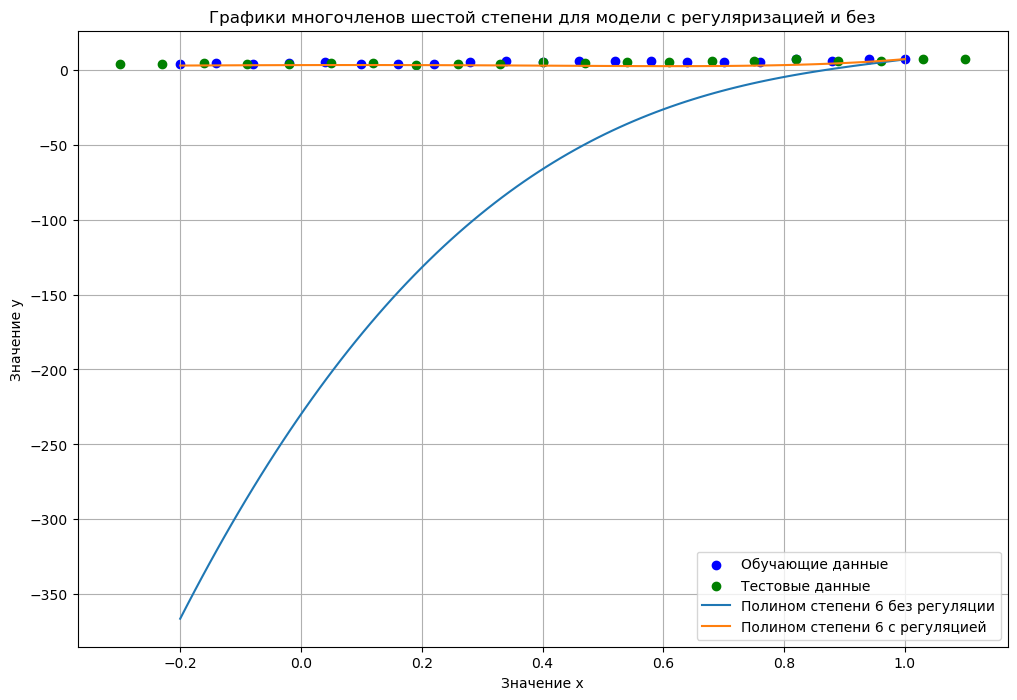

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, label='Обучающие данные', color='blue')
plt.scatter(X_test, y_test, label='Тестовые данные', color='green')
x_plot = np.linspace(X_train.min(), X_train.max(), 100)

X_poly = np.power.outer(X_train, np.arange(7))
coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
polynomial_str = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients)])
y_plot = np.polyval(coefficients, x_plot)
plt.plot(x_plot, y_plot, label=f'Полином степени 6 без регуляции')

coefficients2 = np.linalg.inv(X_poly.T @ X_poly + 0.001 * np.eye(X_poly.shape[1])) @ X_poly.T @ y_train
polynomial_str2 = " + ".join([f"{coef:.4f}x^{i}" for i, coef in enumerate(coefficients2)])
y_plot2 = np.polyval(coefficients2, x_plot)
plt.plot(x_plot, y_plot2, label=f'Полином степени 6 с регуляцией')

plt.xlabel('Значение x')
plt.ylabel('Значение y')
plt.title('Графики многочленов шестой степени для модели с регуляризацией и без')
plt.legend()
plt.grid(True)
plt.show()


**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

╰( ͡° ͜ʖ ͡° )つ──☆*:
В моделе с регуляцией отклонение mse небольшое (не такое большое как в моделе без регуляции), из-за чего график получается более близким к данным обучающим и тестовым и более наглядно видно обучение.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Существование решений:
Целевая функция f(a) = |Xa - y|^2 + λ|a|^2 выпукла (сумма двух выпуклых функций). f(a) непрерывна (как сумма непрерывных функций). f(a) ≥ 0 для всех a ∈ ℝ^k (квадраты неотрицательны). => Согласно теореме Вейерштрасса, непрерывная выпуклая функция, ограниченная снизу, достигает своего минимума на замкнутом ограниченном множестве. =>, решения задачи оптимизации существуют.
Количество решений:
Если λ > 0, то f(a) строго выпукла (λ|a|^2 строго выпукла). Строго выпуклая функция имеет единственный минимум. =>, если λ > 0, то решение единственно. А если λ = 0, то  задача сводится к обычной задаче регрессии методом наименьших квадратов.
Если rk X = k, то решение единственно.
Вывод:
λ > 0: Решение единственно.
λ = 0: Решение единственно, если rk X = k.
Таким образом при λ > 0: Регуляризация "штрафует" модель за большие коэффициенты, что приводит к единственному решению, которое балансирует между точностью и сложностью модели. а при λ = 0: Нет регуляризации, поэтому модель может иметь несколько решений, особенно если признаки линейно зависимы.
 

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Регуляризация коэффициента при константном признаке (который состоит из одних единиц) обычно считается плохой идеей по следующим причинам:
1. Свободный член: Коэффициент при константном признаке представляет собой свободный член (y-пересечение) в линейной модели. Он определяет базовое значение целевой переменной, когда все остальные признаки равны нулю. Регуляризация этого коэффициента может привести к смещению базового значения, что искажает модель.
2. Интерпретация: Свободный член часто имеет важную интерпретацию в контексте задачи. Например, в задаче прогнозирования цены квартиры свободный член может представлять базовую цену квартиры с нулевой площадью, расположенной бесконечно далеко от центра. Регуляризация может сделать эту интерпретацию менее надежной.
3. Не влияет на переобучение: Константный признак не вносит дополнительной сложности в модель, поэтому его регуляризация не помогает предотвратить переобучение.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Существование: Да, решение всегда существует. Как и в случае, когда rk X = k, задача оптимизации сводится к обычной задаче регрессии методом наименьших квадратов, которая всегда имеет хотя бы одно решение. 
Единственность: Нет, решение не единственно. Если rk X < k, то существует бесконечно много решений. Это происходит потому, что векторы-столбцы X линейно зависимы, и существует несколько способов представить вектор y как линейную комбинацию этих векторов.  Неединственность: Если rk X < k, то матрица X^T X не обратима. Это означает, что существует не один вектор a, который минимизирует |Xa - y|^2. Фактически существует бесконечно много таких векторов, и все они являются решениями задачи оптимизации. 
Таким обрдом при λ = 0 и rk X < k: Решение всегда существует, но оно не единственно.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Алгоритм:
Вычислим вектор x_t+1^T * x_t+1: Это скалярное произведение вектора x_t+1 на самого себя.
Вычислим вектор x_t+1^T * X_t: Это умножение транспонированного вектора x_t+1 на матрицу X_t.
Вычислим скаляр y_t+1 * x_t+1: Это произведение y_t+1 на x_t+1.
Вычислим вектор y_t+1 * X_t: Это умножение y_t+1 на матрицу X_t.
Обновим матрицу X_(t+1)^T * X_(t+1): X_(t+1)^T * X_(t+1) = X_t^T * X_t + x_t+1^T * x_t+1
Обоснование сложности: Все операции в этом алгоритме - это умножения векторов и матриц, а также сложения. Сложность этих операций не зависит от t, т.е. от количества точек данных, которые мы уже обработали. Поэтому алгоритм работает за постоянное время, независимо от размера набора данных.

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [31]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    
    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        y_pred = #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

C:\Users\Вадим\AppData\Local\Temp\ipykernel_17160\589488389.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 6

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.